In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns 
from numpy.linalg import inv # For inversing matrix

%matplotlib inline

#### Read The Data

In [2]:
header = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']
input_data = pd.read_csv('auto-mpg.data', names=header)

In [3]:
input_data.loc[:5]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500


#### Remove All Entries with NaN Value

In [4]:
input_data = input_data.dropna()

#### Split Data into Training Set and Test Set

In [5]:
training_set = input_data.sample(frac=0.8)

test_set_index = input_data.index.difference(training_set.index)
test_set = input_data.loc[test_set_index]

#### Plot Training Set

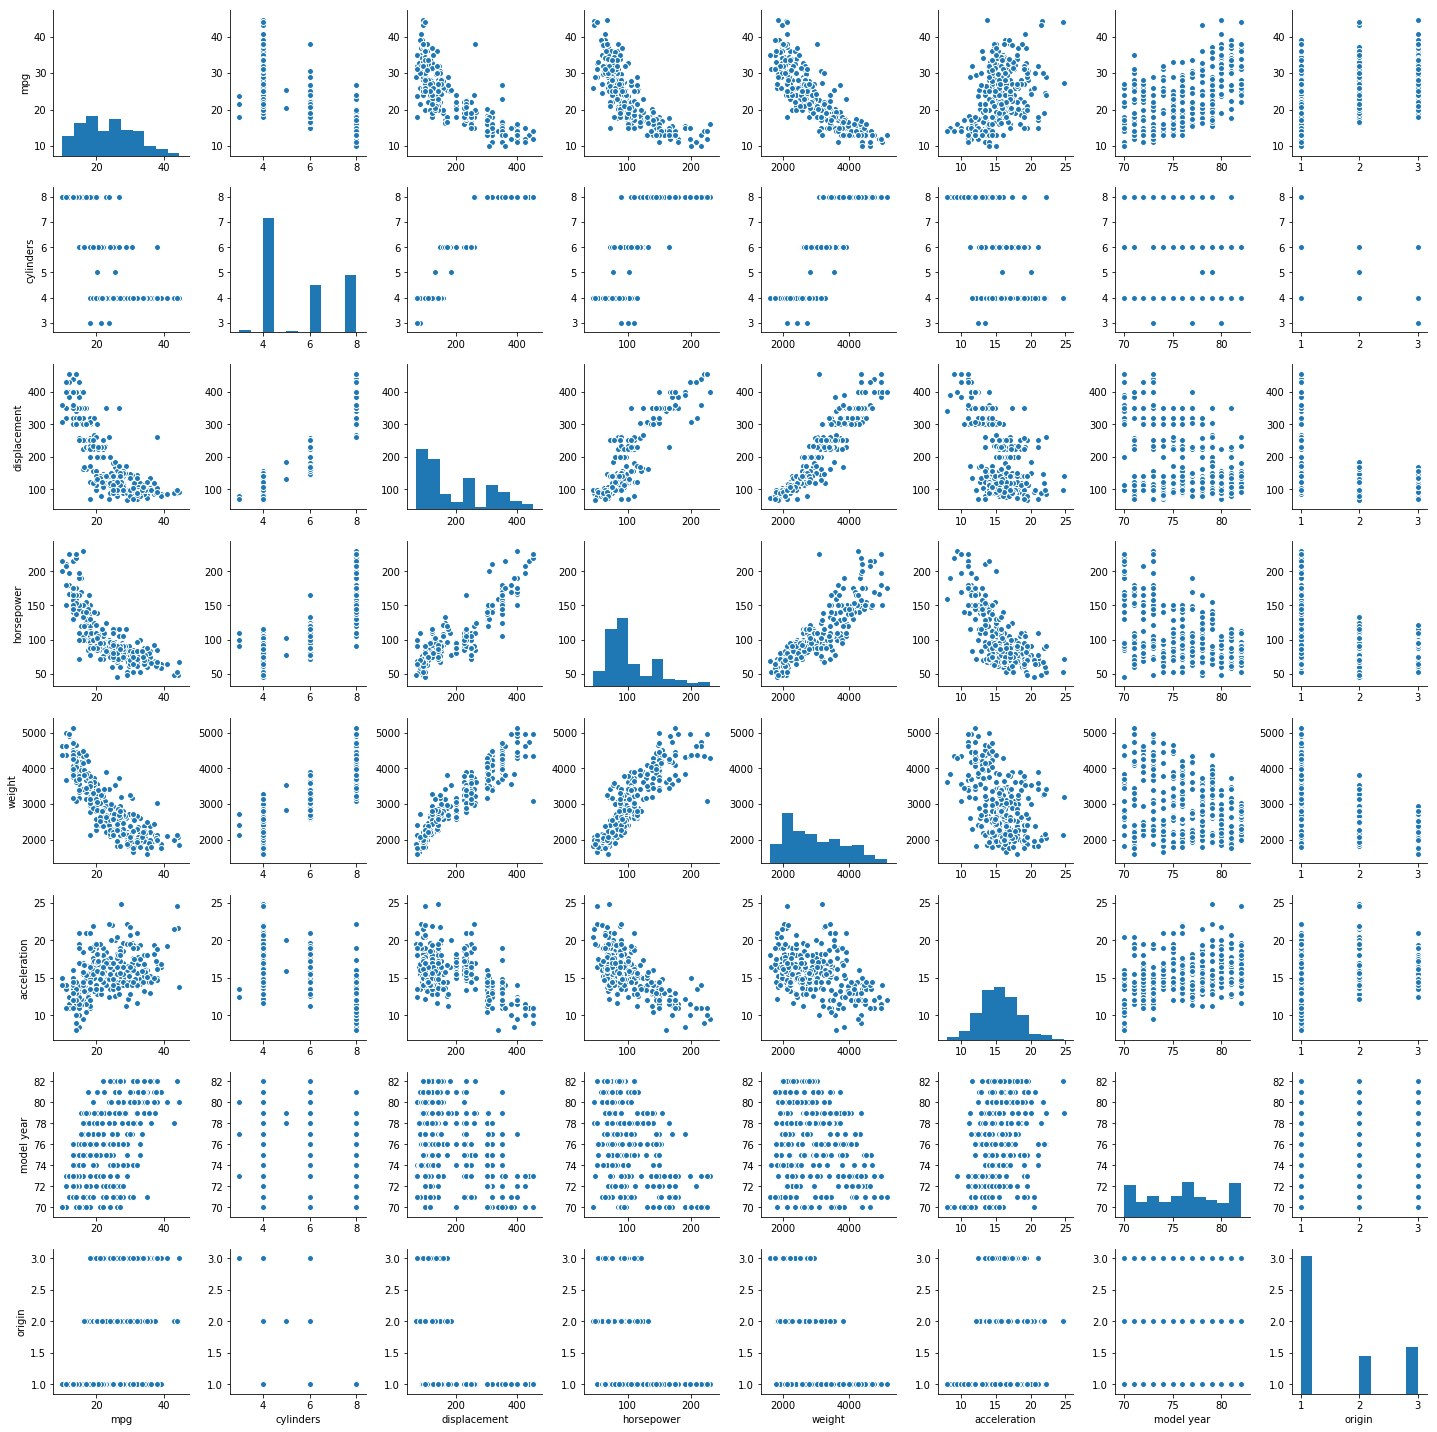

In [6]:
plot = sns.pairplot(training_set)

#### Normal Equation Method

In [7]:
# Get the regressors matrix
# Ignore the last column which contains the name of the cars
df_X = training_set[training_set.columns.tolist()[1:-1]]
df_X = df_X.astype(float)
X = np.mat(DataFrame.as_matrix(df_X))

# Prepend the bias column to the matrix X
bias_vector = np.ones((X.shape[0],1))
X = np.hstack((bias_vector, X))

X.shape

(314, 8)

In [8]:
# Get the response vector
Y = np.mat(DataFrame.as_matrix(training_set[training_set.columns.tolist()[0]])).T
Y.astype(float)

Y.shape

(314, 1)

In [9]:
# Run the normal equation method
thetas = np.matmul(np.matmul(inv(np.matmul(X.T, X)), X.T), Y)

#### Print The Equation for The Linear Model
Note: This model discards the last variable: car name

In [10]:
thetas_list = thetas.tolist()
equation = "y = " + str(thetas_list[0])
for i in range(1, thetas.shape[0]):
    equation += " + " + str(thetas_list[i]) + " * x_" + str(i) 

In [11]:
print(equation)

y = [-12.803746621761963] + [-0.6506880274676596] * x_1 + [0.024744464949285283] * x_2 + [-0.020645630349950234] * x_3 + [-0.006768781393536708] * x_4 + [0.06989156148549625] * x_5 + [0.7129564644911359] * x_6 + [1.1835910875090938] * x_7


#### Test The Model on The Test Set

In [12]:
test_X = test_set[test_set.columns.tolist()[1:-1]].astype(float)
test_X = np.mat(DataFrame.as_matrix(test_X))

# Prepend the bias column to the matrix X
bias_vector = np.ones((test_X.shape[0],1))
test_X = np.hstack((bias_vector, test_X))

In [13]:
# Get the response vector of test set
test_Y = np.mat(DataFrame.as_matrix(test_set[test_set.columns.tolist()[0]])).T
test_Y = test_Y.astype(float)

#### Compute The Sum Squared Errors

In [14]:
# Compute the predicted values using the test set
predict = np.matmul(test_X, thetas)

In [15]:
# Compute the sum squared errors
SSE = np.sum(np.square(test_Y-predict))

#### Report the Sum Squared Error

In [16]:
# Display the SSE
print("The sum squared error is: SSE =", str(SSE))

The sum squared error is: SSE = 1163.42146211


#### Comment on The Performance of The Linear Model

In [17]:
SSE = np.sum(np.square(Y - np.matmul(X, thetas)))
SST = np.sum(np.square(Y - np.mean(Y)))

##### Compute $R^2=1-\frac{SSE}{SST}$

In [18]:
r_squared = 1 - (SSE/SST)

In [23]:
print(str(r_squared*100) + "% of the observations can be explained by the fitted model")

82.979816388% of the observations can be explained by the fitted model
